In [88]:
import sys
sys.path.append('../')

%reload_ext autoreload
%autoreload 2

import Utility as ut
import pandas as pd
import seaborn as sns

## Interesting things
The productivity (precentage of eggs laid) on death percentage can be divided in two/three (it depends from your choice) clusters: the first one has an high productivity and a low death rate; the second one has a medium productivity and a higher death rate; the third one has a really bad productivity and a high death rate. It is interesting that this third cluster is found just in the cycle C while the others two clusters can be appended to almost every cycle. So every cycle starts with the first cluster and ends with the second one.

## Data loading

In [89]:
cycles = []

cycleX1 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_1-Clean.csv")
cycleX1 = cycleX1.drop(columns=["Feed","Water"])
cycleX1['DeathPerc'] = cycleX1['DeathPerc']
cycles.append(cycleX1)

cycleX2 = pd.read_csv("../Data/Chickens data/WithMacro/CycleX_2-Clean.csv")
cycleX2 = cycleX2.drop(columns=["Feed","Water"])
cycles.append(cycleX2)

cycleY = pd.read_csv("../Data/Chickens data/WithMacro/CycleY-Clean.csv")
cycleY = cycleY.drop(columns=["Feed","Water"])
cycles.append(cycleY)

cycleZ = pd.read_csv("../Data/Chickens data/WithMacro/CycleZ-Clean.csv")
cycleZ = cycleZ.drop(columns=["Feed","Water"])
cycles.append(cycleZ)

cycleA = pd.read_csv("../Data/Chickens data/WithMacro/CycleA-Clean.csv")
# cycleA = cycleA.drop(columns=["Feed","Water"])
cycles.append(cycleA)

cycleB = pd.read_csv("../Data/Chickens data/WithMacro/CycleB-Clean.csv")
# cycleB = cycleB.drop(columns=["Feed","Water"])
cycles.append(cycleB)

# cycle = pd.concat(cycles, axis=0, ignore_index=True)
# cycle

## Parameters

In [90]:
variables_to_cluster = ["Laied", "DeathPerc"]
variable_to_plot_1 = 'DeathPerc'
variable_to_plot_2 = 'Laied'
variable_to_plot_3 = 'AvgTemp'

## Plotting function

In [91]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# import matplotlib.dates as mdates
# import matplotlib.ticker as mticker
# import matplotlib as mpl

def addPriceToCycle(dataSets):
    '''
    Function add to each cycle the price of eggs in that period of time.
    '''
    eggs_price_bio = pd.read_csv("..\Data\EggsData\price_bio.csv", sep=",")
    eggs_price_non_bio = pd.read_csv("..\Data\EggsData\price_non_bio.csv", sep=",")

    eggs_price = pd.concat([eggs_price_bio, eggs_price_non_bio])

    eggs_price['Date'] = pd.to_datetime(eggs_price[['Month', 'Day', 'Year']])
    eggs_price.pop('Year')
    eggs_price.pop('Day')
    eggs_price.pop('Month')
    
    newDataSets = []
    
    for dataSet in dataSets:
        dataSet['Date of Laid'] = pd.to_datetime(dataSet['Date of Laid'])
        dataSet = pd.merge(dataSet, eggs_price, left_on='Date of Laid', right_on='Date', how='left')
        dataSet['Price'] = dataSet['Price'].fillna(method='ffill')
        dataSet['Price'] = dataSet['Price'].fillna(method='bfill')
        dataSet['Earnings'] = dataSet['Price']*(dataSet['Eggs'])
        dataSet.pop('Date')
        newDataSets.append(dataSet)
    
    return newDataSets


def compareDifferentCycles(dataSets, attribute):
    '''
    Function to compare two cycles attributes or more
    '''
    
    fig, ax = plt.subplots()
    ax.set_xlabel('Period')
    ax.set_ylabel(attribute)
    #Select to plot just years
    # ax.xaxis.set_major_locator(mpl.dates.DayLocator((1, 15)))
    # ax.xaxis.set_minor_locator(mpl.dates.MonthLocator((1,4,7,10)))
    # ax.xaxis.set_major_formatter(mpl.dates.DateFormatter("\n%d"))
    # ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%b"))
    fig.set_figwidth(20)
    
    legend = ['X1', 'X2', 'Y', 'Z', 'A', 'B']
    
    # apply min-max normalization
    # scaler = MinMaxScaler()
    # dataSets = pd.DataFrame(scaler.fit_transform(dataSets.values), columns=dataSets.columns, index=dataSets.index)
    
    for idx, dataSet in enumerate(dataSets):
        # remove columns with informations that could not be plot
        dataSet = dataSet.drop(columns=["Arrival Chickens Date","Date of Selling","Date of Laid"])
        # choose only the enteresting attribute
        dataSet = dataSet[attribute]
        
        window = 30
        avarageData = []
        nparray = np.array(dataSet)
        for i in range(len(nparray) - window + 1):
            avarageData.append(np.mean(nparray[i:i+window]))
        dataSet = avarageData
        ax.plot(dataSet, label=legend[idx])
        
    
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")
    plt.legend(legend)
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=31))

## Analysis

In [92]:

legend = ['X1', 'X2', 'Y', 'Z', 'A', 'B']



for i, cycle in enumerate(cycles):
    productivity = (cycle['Eggs'].sum() / cycle['Chickens'].get(0))
    days = len(cycle.index)
    print(legend[i])
    print("#Eggs/Chickens (Productivity): ", productivity)
    print("Days of breed: ", days)
    print("Productivity/Breeding days: ", productivity/days)
    print()
    


X1
#Eggs/Chickens (Productivity):  366.76762587795986
Days of breed:  478
Productivity/Breeding days:  0.7672962884476148

X2
#Eggs/Chickens (Productivity):  316.29420872039503
Days of breed:  342
Productivity/Breeding days:  0.9248368676034943

Y
#Eggs/Chickens (Productivity):  292.2477592159872
Days of breed:  359
Productivity/Breeding days:  0.8140606106294908

Z
#Eggs/Chickens (Productivity):  420.6323285070021
Days of breed:  505
Productivity/Breeding days:  0.8329353039742616

A
#Eggs/Chickens (Productivity):  481.04182437096813
Days of breed:  627
Productivity/Breeding days:  0.7672118411020226

B
#Eggs/Chickens (Productivity):  436.90056534752244
Days of breed:  586
Productivity/Breeding days:  0.7455641046886049



In [93]:
for i, cycle in enumerate(cycles):
    deathsOnChickens = (cycle['Death'].sum() / cycle['Chickens'].get(0))
    days = len(cycle.index)
    print(legend[i])
    print("Deaths/Chickens:  ", deathsOnChickens)
    print("Days of breed: ", days)
    print("Deaths avarage: ", cycle['Death'].sum()/days)
    print()

X1
Deaths/Chickens:   0.14320007112586314
Days of breed:  478
Deaths avarage:  10.108786610878662

X2
Deaths/Chickens:   0.07050799230061093
Days of breed:  342
Deaths avarage:  4.926900584795321

Y
Deaths/Chickens:   0.07536707006591567
Days of breed:  359
Deaths avarage:  12.038997214484679

Z
Deaths/Chickens:   0.10225492523142654
Days of breed:  505
Deaths avarage:  8.530693069306931

A
Deaths/Chickens:   0.24144826108690995
Days of breed:  627
Deaths avarage:  16.177033492822968

B
Deaths/Chickens:   0.25150838519644636
Days of breed:  586
Deaths avarage:  18.068259385665527



X1


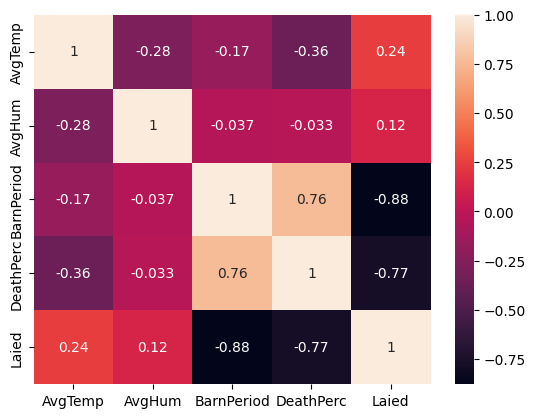

X2


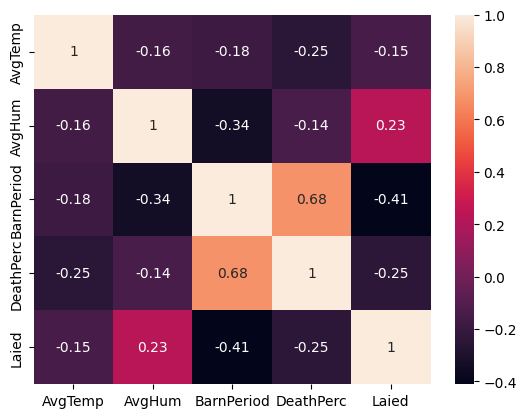

Y


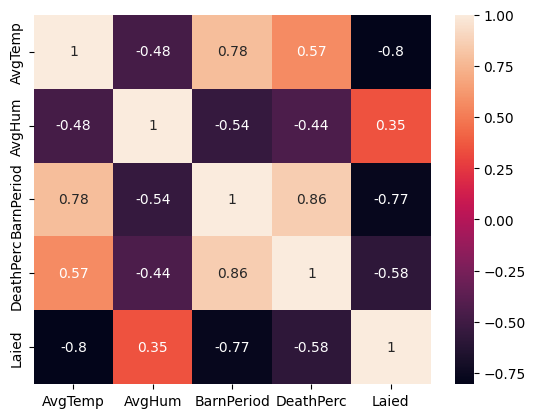

Z


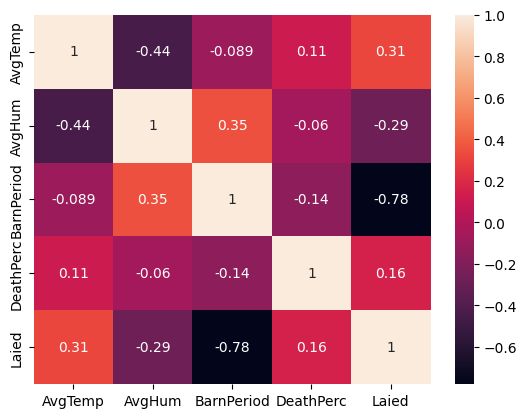

A


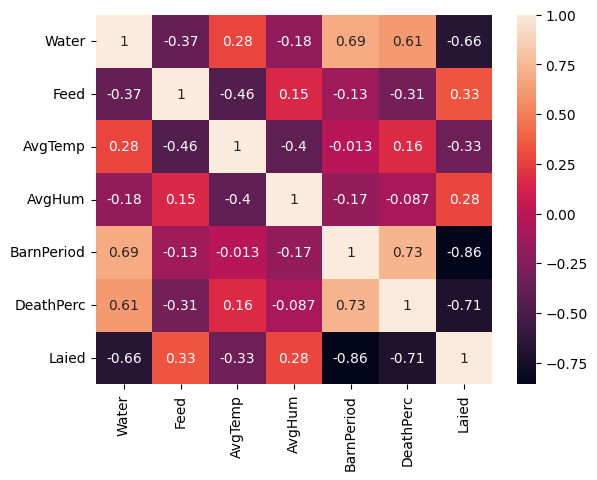

B


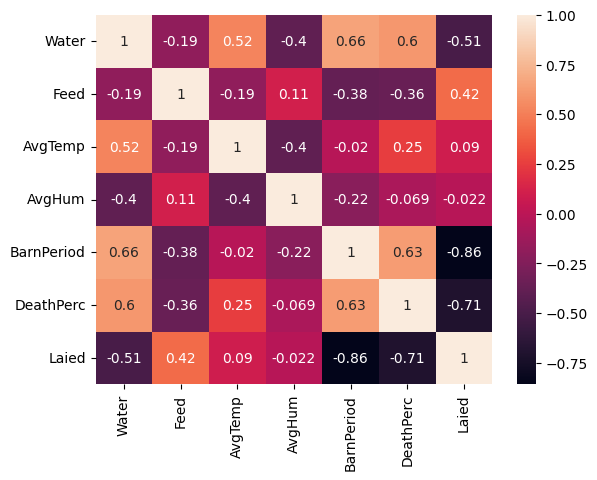

In [94]:
input_features_1 = ['Water', 'Feed', 'AvgTemp', 'AvgHum', 'BarnPeriod']
input_features_2 = ['AvgTemp', 'AvgHum', 'BarnPeriod']
output_features = ['DeathPerc','Laied']

for i, cycle in enumerate(cycles):
    cycle['BarnPeriod'] = (pd.to_datetime(cycle['Date of Laid']) - pd.to_datetime(cycle['Arrival Chickens Date'])).dt.days
    if(i<4):
        print(legend[i])
        sns.heatmap(cycle[input_features_2+output_features].corr(), annot=True)
        plt.show()
    else:
        print(legend[i])
        sns.heatmap(cycle[input_features_1+output_features].corr(), annot=True)
        plt.show()

In [95]:
cycles = addPriceToCycle(cycles)

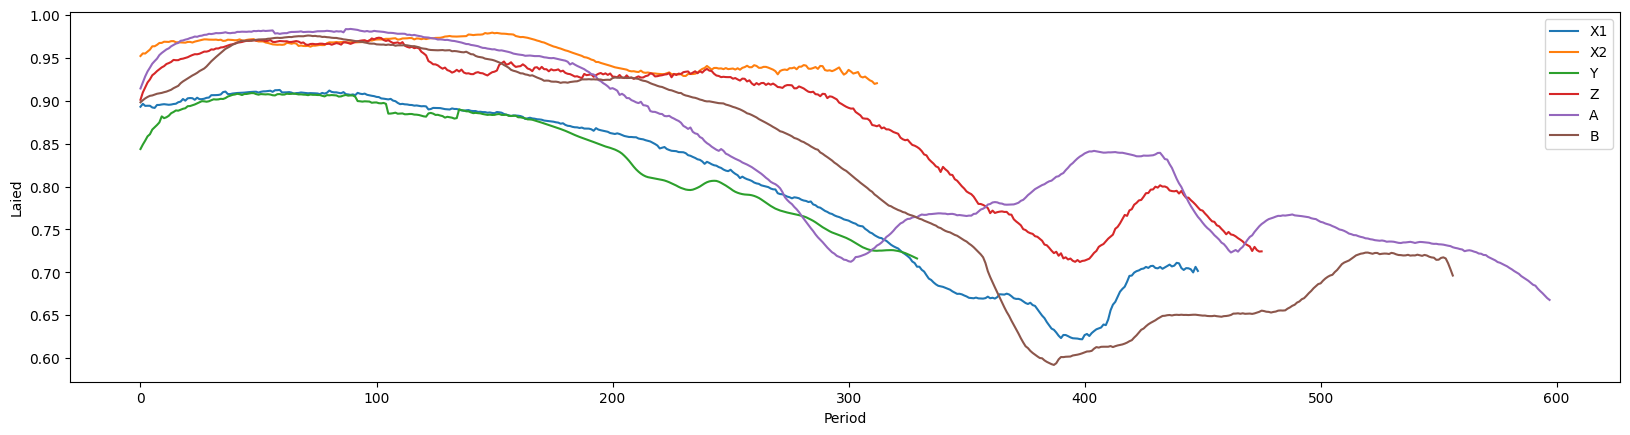

In [96]:
compareDifferentCycles(cycles, 'Laied')

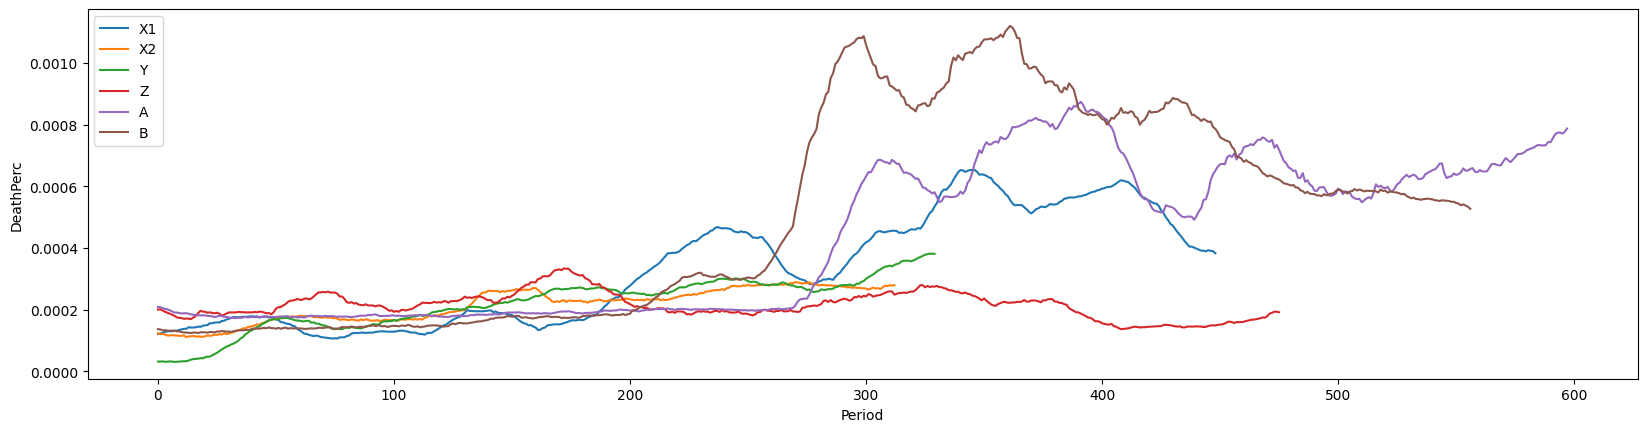

In [97]:
compareDifferentCycles(cycles, 'DeathPerc')

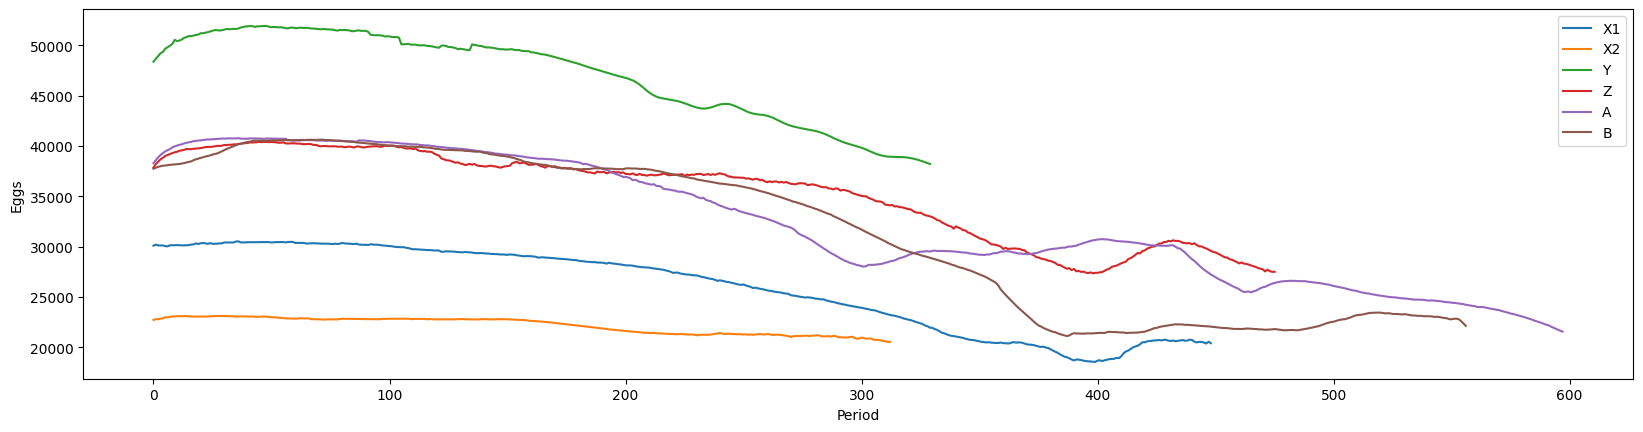

In [98]:
compareDifferentCycles(cycles, 'Eggs')

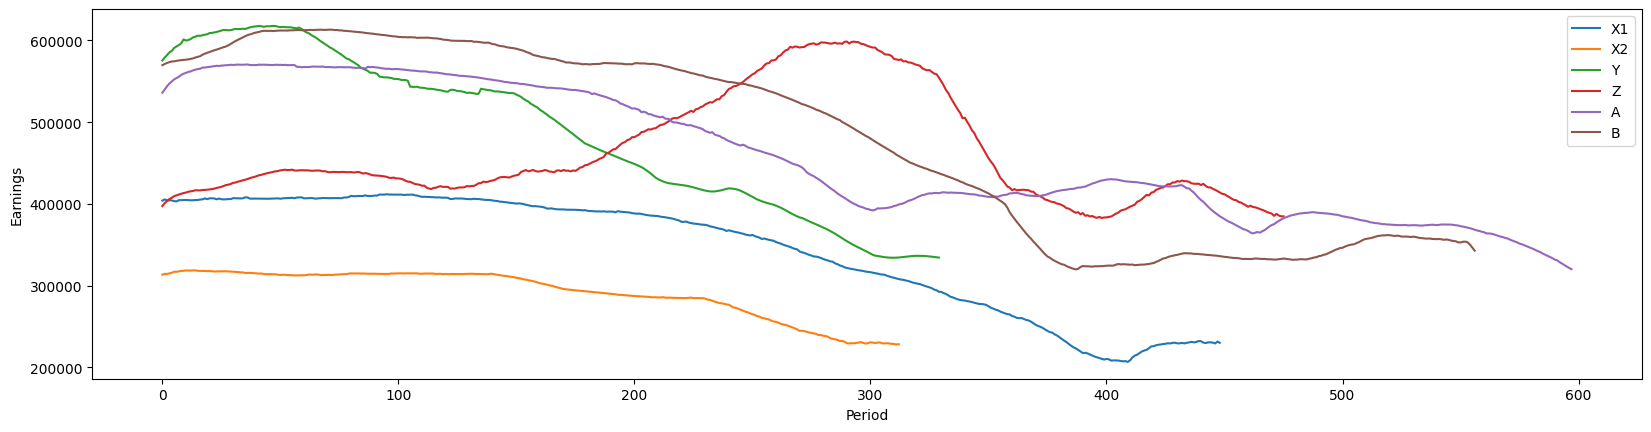

In [99]:
compareDifferentCycles(cycles, 'Earnings')